[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Arahmanizadeh/gsproginpython/blob/main/Course1_Lesson06.ipynb)

# 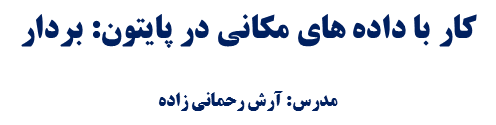

## Geopandas
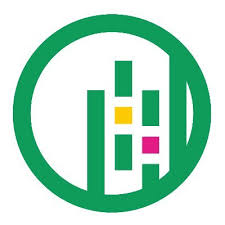

GeoPandas extends the Pandas library to enable spatial operations. </br>
GeoPandas is built on top of the following libraries that allow it to be spatially aware.
* **Shapely** for geometric operations (i.e. buffer, intersections etc.)
* **PyProj** for working with projections
* **Fiona** for file input and output, which itself is based on the widely used GDAL/OGR library

### Data Structures
GeoPandas implements two main data structures, a GeoSeries and a GeoDataFrame. These are subclasses of pandas Series and DataFrame, respectively.

## Vector Data
Vector features can be decomposed into three different geometric primitives: points, polylines and polygons.

### Point

An Example for GeoSeries

In [ ]:


d = {'name': ['Washington\n(38.90, -77.03)', 'Baltimore\n(39.29, -76.61)','Fredrick\n(39.41,-77.40)'], 
     'geometry': [Point(-77.036873,38.907192), Point(-76.612190,39.290386,), Point(-77.408456,39.412006)]}


### Polyline

In [ ]:

d = {'name': ['Washington\n(38.90, -77.03)' ], 
     'geometry': [LineString([Point(-77.036873,38.907192), Point(-76.612190,39.290386,), Point(-77.408456,39.412006)])]}


### Polygon

In [ ]:

d = {'name': ['Washington\n(38.90, -77.03)' ], 
     'geometry': [Polygon([Point(-77.036873,38.907192), Point(-76.612190,39.290386,), Point(-77.408456,39.412006)])]}


## Vector Data File Formats

### GeoJSON

GeoJSON is an open standard format designed for representing simple geographical features, along with their non-spatial attributes. It is based on the JSON format.

JSON (JavaScript Object Notation)



```
  { "type": "FeatureCollection",
    "features": [
      { "type": "Feature",
        "geometry": {"type": "Point", "coordinates": [102.0, 0.5]},
        "properties": {"prop0": "value0"}
        },
      { "type": "Feature",
        "geometry": {
          "type": "LineString",
          "coordinates": [
            [102.0, 0.0], [103.0, 1.0], [104.0, 0.0], [105.0, 1.0]
            ]
          },
        "properties": {
          "prop0": "value0",
          "prop1": 0.0
          }
        },
      { "type": "Feature",
         "geometry": {
           "type": "Polygon",
           "coordinates": [
             [ [100.0, 0.0], [101.0, 0.0], [101.0, 1.0],
               [100.0, 1.0], [100.0, 0.0] ]
             ]
         },
         "properties": {
           "prop0": "value0",
           "prop1": {"this": "that"}
           }
         }
       ]
     }
```



### GeoPackage

* open format standards (i.e. it is non-proprietary). 
* It’s built on top of SQLite. 
* Its one big advantage over many other vector formats is its compactness–coordinate value, metadata, attribute table, projection information, etc…, are all stored in a single file which facilitates portability. 


### Shapefile

A shapefile is a file-based data format native to ArcView 3.x software

The list of files that define a “shapefile” are shown in the following table.
<table class="colwidths-auto table">
<thead>
<tr class="row-odd"><th class="head"><p>File extension</p></th>
<th class="head"><p>Content</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p>.dbf</p></td>
<td><p>Attribute information</p></td>
</tr>
<tr class="row-odd"><td><p>.shp</p></td>
<td><p>Feature geometry</p></td>
</tr>
<tr class="row-even"><td><p>.shx</p></td>
<td><p>Feature geometry index</p></td>
</tr>
<tr class="row-odd"><td><p>.aih</p></td>
<td><p>Attribute index</p></td>
</tr>
<tr class="row-even"><td><p>.ain</p></td>
<td><p>Attribute index</p></td>
</tr>
<tr class="row-odd"><td><p>.prj</p></td>
<td><p>Coordinate system information</p></td>
</tr>
<tr class="row-even"><td><p>.sbn</p></td>
<td><p>Spatial index file</p></td>
</tr>
<tr class="row-odd"><td><p>.sbx</p></td>
<td><p>Spatial index file</p></td>
</tr>
</tbody>
</table>

### Geodatabase

A file geodatabase is a relational database storage format.

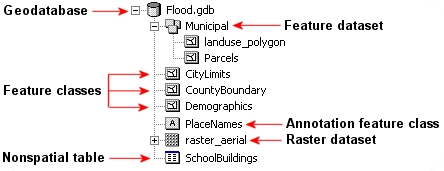

## Work with Vector Data File

### Download data to colab

In [ ]:
import gdown
url = 'https://drive.google.com/uc?id=1JdVg5L3tJy8I5MI3Z09MSTvW7qBNbnz9'
output = 'karnataka.zip'
gdown.download(url, output, quiet=False)

In [ ]:
!unzip karnataka.zip

### Reading Spatial Data

In [ ]:
import os
path = 'karnataka.gpkg'

### Filtering Data

For our analysis, we need to apply a filter to extract only the road segments where the ref attribute starts with ‘NH’ - indicating a national highway. We can apply boolean filtering using Panda’s str.match() method with a regular expression.

### Working with Projections

In [ ]:
print(filtered.crs) # WGS84 CRS # https://epsg.io/4326

In [ ]:

print('Total length of national highways in the state is {} KM'.format(total_length/1000))

### Performing Spatial joins

reference: [1](https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html)

There are two ways to combine datasets in geopandas – table joins and spatial joins. For our task, we need information about which district each road segments belongs to. This can be achived using another spatial layer for the districts and doing a spatial join to transfer the attributes of the district layer to the matching road segment.

A spatial join is performed using the sjoin() method. It takes 2 core arguments.

* predicate: The spatial predicate to decdie which objects to join. Options are intersects, within and contains.
* how: The type of join to perform. Options are left, right and inner.


### Group Statistics

In [ ]:
output_filename = 'national_highways_by_districts.csv'
results.to_csv(output_filename)
print('Successfully written output file at {}'.format(output_filename))

### Geopandas datasets

In [ ]:


df = pd.DataFrame({'city': ['Berlin', 'Paris', 'Munich'],
                   'latitude': [52.518611111111, 48.856666666667, 48.137222222222],
                   'longitude': [13.408333333333, 2.3516666666667, 11.575555555556]})
gdf = gpd.GeoDataFrame(df.drop(['latitude', 'longitude'], axis=1),
                       crs={'init': 'epsg:4326'},
                       geometry=[shapely.geometry.Point(xy)
                                 for xy in zip(df.longitude, df.latitude)])


## Creating Spatial Data

A common operation in spatial analysis is to take non-spatial data, such as CSV files, and creating a spatial dataset from it using coordinate information contained in the file. GeoPandas provides a convenient way to take data from a delimited-text file, create geometry and write the results as a spatial dataset.

We will read a tab-delimited file of places, filter it to a feature class, create a GeoDataFrame and export it as a GeoPackage file.

In [ ]:
import gdown
url = 'https://drive.google.com/uc?id=1n6wSnvrhEZ4Vuq4fVP5B93Znf7nVtLte'
output = 'US.zip'
gdown.download(url, output, quiet=False)

In [ ]:
!unzip US.zip


In [ ]:
filename = 'US.txt'

In [ ]:
import os
import pandas as pd
import geopandas as gpd

### Reading Tab-Delimited Files

In [ ]:
column_names = [
    'geonameid', 'name', 'asciiname', 'alternatenames', 
    'latitude', 'longitude', 'feature class', 'feature code',
    'country code', 'cc2', 'admin1 code', 'admin2 code',
    'admin3 code', 'admin4 code', 'population', 'elevation',
    'dem', 'timezone', 'modification date'
]



### Filtering Data

reference: [1](https://www.geonames.org/export/codes.html)

The input data as a column feature_class categorizing the place into 9 feature classes. We can select all rows with the value T with the category mountain,hill,rock…

In [ ]:

print(mountains.head()[['name', 'latitude', 'longitude', 'dem','feature class']])

### Creating Geometries

GeoPandas has a conveinent function points_from_xy() that creates a Geometry column from X and Y coordinates. We can then take a Pandas dataframe and create a GeoDataFrame by specifying a CRS and the geometry column.

### Writing Files

In [ ]:
output_filename = 'mountains.gpkg'

print('Successfully written output file at {}'.format(output_filename))

### Open in QGIS

https://docs.qgis.org/3.28/en/docs/training_manual/basic_map/preparation.html

* layer -> Data Source Manager
* Click on the Vector tab.
* Enable the radioButtonOnFile source type.
* Press the … button next to Vector Dataset(s).
* Select the file in your directory.
* Click Open. 

right click in layer to show attribute table



# end of lesson06